In [42]:
# Imports 
import GetTripModel
import importlib

In [43]:
model = None

In [44]:
importlib.reload(GetTripModel)

class TrainingGetTripModel(GetTripModel.SpacyGetTripModel):
    def prepare_data(self, data):
        prepared_data = []
        for item in data:
            text = item['sentence']
            ents = []
            # This model only works with real trip sentences, ie with a departure and an arrival
            if len(item['entities']) != 2:
                continue
            for ent in item['entities']:
                ents.append((ent['start'], ent['end'], ent['label']))

            prepared_data.append((text, {"entities": ents}))
        return prepared_data

# Refresh the methods of the model if it was already instanciated
if model:
    model.__class__ = TrainingGetTripModel
    TrainingGetTripModel.refresh_methods(model)

In [47]:
# Load data
model = TrainingGetTripModel()

# Training

In [48]:
num_positives = len([item for item in model.train_data if len(item[1]["entities"]) > 0])
num_negatives = len([item for item in model.train_data if len(item[1]["entities"]) == 0])
print(f"Exemples positifs : {num_positives}, Exemples négatifs : {num_negatives}")
print(f"Exemple d'entraînement : {model.train_data[0]}")


Exemples positifs : 3991, Exemples négatifs : 0
Exemple d'entraînement : ('je cherche un billet de train pour voyager de le pouzin à saint-aubin-des-landes.', {'entities': [(46, 55, 'VILLE_DEPART'), (58, 80, 'VILLE_DESTINATION')]})


In [49]:
# Model creation
model.load_model("fr_core_news_md")

In [50]:
# Training
model.train(12, drop=0.30)

Iteration 1, losses : {'ner': np.float32(2341.5205)}
Iteration 2, losses : {'ner': np.float32(680.11414)}
Iteration 3, losses : {'ner': np.float32(417.1037)}
Iteration 4, losses : {'ner': np.float32(345.04004)}
Iteration 5, losses : {'ner': np.float32(292.41373)}
Iteration 6, losses : {'ner': np.float32(271.84076)}
Iteration 7, losses : {'ner': np.float32(237.30855)}
Iteration 8, losses : {'ner': np.float32(241.74586)}
Iteration 9, losses : {'ner': np.float32(161.38643)}
Iteration 10, losses : {'ner': np.float32(180.12761)}
Iteration 11, losses : {'ner': np.float32(231.3701)}
Iteration 12, losses : {'ner': np.float32(98.464005)}


In [51]:
# Save the model
model.save("model_ner_trained")

# Testing

Model: Trained model


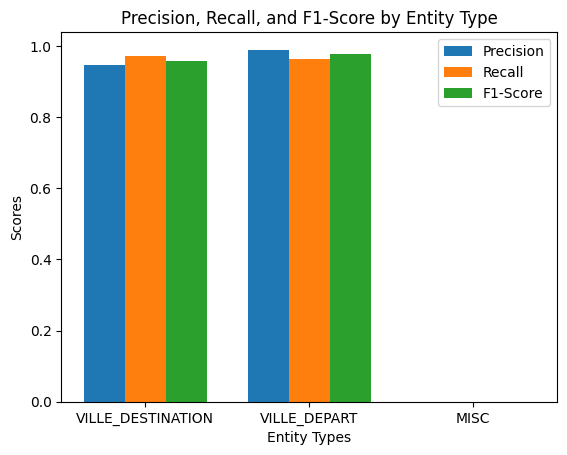

{'token_acc': 1.0,
 'token_p': 1.0,
 'token_r': 1.0,
 'token_f': 1.0,
 'pos_acc': None,
 'morph_acc': None,
 'morph_micro_p': None,
 'morph_micro_r': None,
 'morph_micro_f': None,
 'morph_per_feat': None,
 'sents_p': None,
 'sents_r': None,
 'sents_f': None,
 'dep_uas': None,
 'dep_las': None,
 'dep_las_per_type': None,
 'tag_acc': None,
 'lemma_acc': None,
 'ents_p': 0.9663532904502722,
 'ents_r': 0.9677898909811695,
 'ents_f': 0.9670710571923744,
 'ents_per_type': {'VILLE_DESTINATION': {'p': 0.9477756286266924,
   'r': 0.9712586719524281,
   'f': 0.9593734703866862},
  'VILLE_DEPART': {'p': 0.9898270600203459,
   'r': 0.9643211100099108,
   'f': 0.9769076305220884},
  'MISC': {'p': 0.0, 'r': 0.0, 'f': 0.0}}}

In [54]:
model.evaluate_model(model.test_data, "Trained model")

# Validation

Model: Trained model


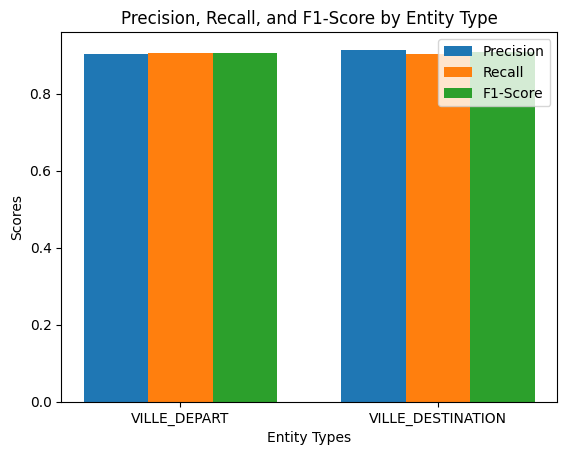

{'token_acc': 1.0,
 'token_p': 1.0,
 'token_r': 1.0,
 'token_f': 1.0,
 'pos_acc': None,
 'morph_acc': None,
 'morph_micro_p': None,
 'morph_micro_r': None,
 'morph_micro_f': None,
 'morph_per_feat': None,
 'sents_p': None,
 'sents_r': None,
 'sents_f': None,
 'dep_uas': None,
 'dep_las': None,
 'dep_las_per_type': None,
 'tag_acc': None,
 'lemma_acc': None,
 'ents_p': 0.9084821428571429,
 'ents_r': 0.9044444444444445,
 'ents_f': 0.9064587973273943,
 'ents_per_type': {'VILLE_DEPART': {'p': 0.9026548672566371,
   'r': 0.9066666666666666,
   'f': 0.9046563192904656},
  'VILLE_DESTINATION': {'p': 0.9144144144144144,
   'r': 0.9022222222222223,
   'f': 0.9082774049217003}}}

In [53]:
model.evaluate_model(model.validation_data, "Trained model")